Từ số tiền quảng cáo trên TV dự đoán được doanh số bán hàng

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data\\advertising.csv')

In [3]:
# TV, Radio, Newspaper là Số tiền quảng cáo 
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


$$Sales = TV*Weight + Bias$$

+ Sale được gọi là biến phụ thuộc
+ TV được gọi là biến độc lập
+ Bias được gọi là intercept, là giá trị của hàm số tuyến tính được tạo thành từ dữ liệu đầu vào khi biến độc lập có giá trị bằng 0

In [4]:
X = df[['TV']]
y = df[['Sales']]

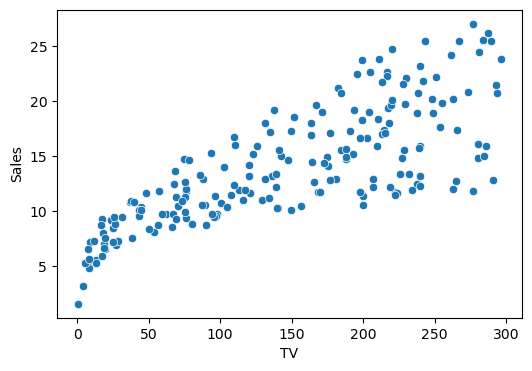

In [5]:
# biểu đồ tương quan giữa số tiền quảng cáo và doanh số bán hàng
# từ biểu đồ trên ta có thể thấy, ta có thể vẽ được 1 đường thẳng tuyến tính để có thể model được mối liên hệ giữa số tiền quảng cáo và doanh số bán hàng
# => ta có thể sử dụng Linear Regression để giải quyết bài toán này

plt.figure(figsize = (6,4))
sns.scatterplot(x = X['TV'], y = y['Sales'])
plt.show()

In [6]:
# train_test_split: được sử dụng để phân chia tập dữ liệu thành 2 phần 
# tập train huấn luyện model
# tập test để đánh giá hiệu suất của model
from sklearn.model_selection import train_test_split

In [7]:
# test_size là tỉ lệ của tập dữ liệu để tạo thành tập test
# random_state là một tham số trong scikit-learn được sử dụng để kiểm soát việc tạo ra các giá trị ngẫu nhiên
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [8]:
print('X train', X_train.shape)
print('y train', y_train.shape)
print('X test', X_test.shape)
print('y test', y_test.shape)

X train (160, 1)
y train (160, 1)
X test (40, 1)
y test (40, 1)


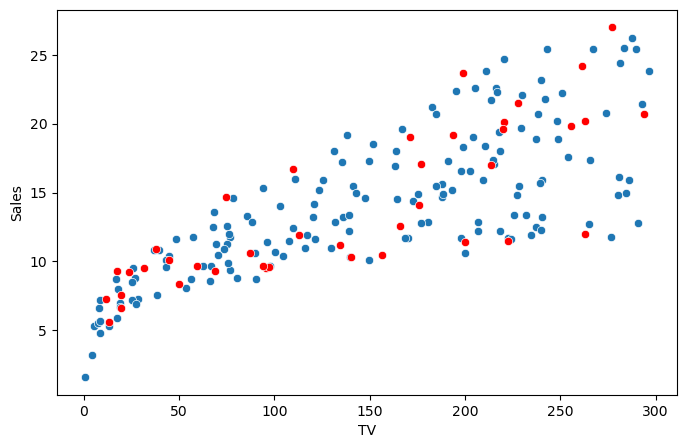

In [9]:
# sử dụng scatterplot trong thư viện seaborn để hiển thị tập train và tập test trên biểu đồ phân tán.
plt.figure(figsize = (8,5))
sns.scatterplot(x = X_train['TV'], y = y_train['Sales'])
sns.scatterplot(x = X_test['TV'], y = y_test['Sales'], color = 'red')
plt.show()

In [10]:
# mean_squared_error để đánh giá model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [11]:
model = LinearRegression(fit_intercept=False, n_jobs = -1)

In [12]:
model.fit(X_train, y_train)

LinearRegression(fit_intercept=False, n_jobs=-1)

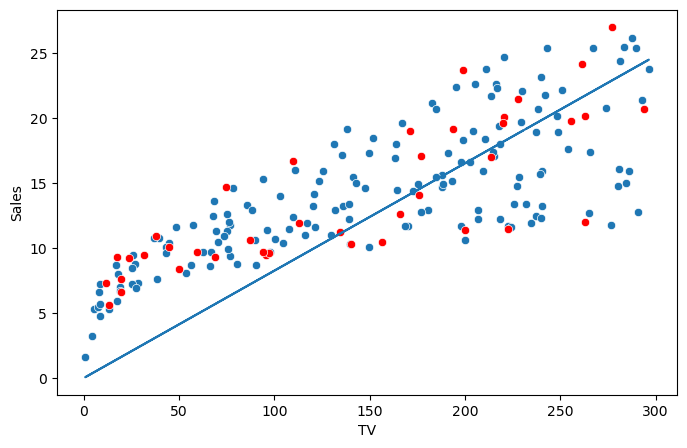

In [13]:
plt.figure(figsize = (8,5))
sns.scatterplot(x = X_train['TV'], y = y_train['Sales'])
sns.scatterplot(x = X_test['TV'], y = y_test['Sales'], color = 'red')

plt.plot(X, model.predict(X))

plt.show()

In [14]:
mean_squared_error(y_train, model.predict(X_train))

23.069022720401758

In [15]:
mean_squared_error(y_test, model.predict(X_test))

22.971258262645847

In [16]:
y_test_pred = model.predict(X_test)

In [17]:
comp_df = pd.concat(
[
    X_test.reset_index().drop(columns = 'index'),
    y_test.reset_index().drop(columns = 'index'),
    pd.DataFrame(y_test_pred)
], 
axis = 1)

comp_df.columns = ['X_test', 'actual_sales', 'pred_sales']
comp_df.head(3)

,X_test,actual_sales,pred_sales
0,74.7,14.7,6.175126
1,255.4,19.8,21.112814
2,112.9,11.9,9.332955


In [18]:
print('Weight:', model.coef_)
print('Bias: ', model.intercept_)

Weight: [[0.08266568]]
Bias:  0.0
